IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME03: programmation du perceptron

Dans ce TP, nous allons principalement programmer un perceptron, en nous restreignant au cas binaire où les données sont étiquetées $+1$ ou $-1$ (comme les séances précédentes).

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

In [1]:
#Sahli Oussama
#Brami Nathan

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-03</tt> et rajouter à la suite de <tt>tme-03</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-03-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">** à la fin de la séance**</font>. C'est ce compte-rendu qui donne la note de base de la séance.
- vous pouvez éventuellement compléter votre compte-rendu  pour obtenir des points bonus, dans ce cas, vous devez soumettre votre complément avant le début de la semaine suivante.

** Sur la page Moodle de remise du travail <font color="RED">ne pas oublier d'envoyer le compte rendu</font>** à la fin de la séance, la soumission de la version complémentaire post-séance se fera sur une page différente.

## Création d'une librairie

Afin de pouvoir réutiliser les classes et fonctions écrites dans les séances de TDTME précédentes, on va construire une librairie qu'il suffira d'importer.

Récupérer l'archive iads.tgz et la désarchiver de telle sorte que le répertoire iads soit un répertoire frère du répertoire tme03.

Ainsi, vous devrez avoir l'arborescence suivante dans votre répertoire $HOME:

    - 3i026/
        - tme01/
            - tme01.ipynb
        - tme02/
            - tme02.ipynb
        - tme03/
            - tme03.ipynb
        - iads/
            - Classifiers.py
            - LabeledSet.py
            - utils.py
          

**Important** :
- ce fichier tme03.ipynb doit toujours rester dans le répertorie tme03/
- pour ouvrir les fichiers py qui se trouvent dans le répertoire iads/ il est nécessaire d'utiliser un éditeur de texte comme emacs, gedit, idle,...


<font color="RED" size="+1">**[Q]**</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Pour compléter ces fichiers, reprendre le code écrit dans le TDTME précédent pour compléter toute les parties indiquées <tt>#TODO</tt>.
- dans utils.py, il faut compléter la fonction createGaussianDataset
- dans Classifiers.py, il faut compléter le code des classifiers

Une fois ces fichiers complétés, la librairie <tt>iads</tt> peut être importée dans ce notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  



La commande <tt>help</tt> permet d'avoir des informations sur le contenu d'une librairie importée:

In [3]:
class LabeledSet:  
    """ Classe pour représenter un ensemble d'exemples (base d'apprentissage)
        Variables d'instance :
            - input_dimension (int) : dimension de la description d'un exemple (x)
            - nb_examples (int) : nombre d'exemples dans l'ensemble
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self,vector,label):
        """ Ajout d'un exemple dans l'ensemble
            Argument: 
                - vector ()
                - label (int) : classe de l'exemple (+1 ou -1)
            
        """
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x, vector))  
            self.y = np.vstack((self.y, label))
        
        self.nb_examples = self.nb_examples + 1   
    
    def getInputDimension(self):
        """ Renvoie la dimension de l'espace d'entrée
        """
        return self.input_dimension
    
    def size(self):
        """ Renvoie le nombre d'exemples dans l'ensemble
        """
        return self.nb_examples
    
    def getX(self, i):
        """ Renvoie la description du i-eme exemple (x_i)
        """
        return self.x[i]             
    
    #
    def getY(self, i):
        """ Renvoie la classe de du i-eme exemple (y_i)
        """
        return(self.y[i])

In [4]:
# Exemple d'utilisation de LabeledSet

une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D
une_base.addExample([0, 1],1)   # ajout de l'exemple (0, 1) de classe +#1
#print(une_base.getX(0))
une_base.addExample([2, 3],1)   # ajout de l'exemple (2, 3) de classe +#1
#print(une_base.getX(1))
une_base.addExample([1, 2],-1)  # ajout de l'exemple (1, 2) de classe -1#
#print(une_base.getX(2))
une_base.addExample([2, 2],-1)  # ajout de l'exemple (2, 2) de classe -1
#print(une_base.getX(3))

S_pos = une_base.x[np.where(une_base.y == 1),:][0]
print(S_pos)
#print(une_base.x) # affiche tous les points sans leur classe
#print(une_base.x[np.where(une_base.y==1)])
#print(np.where(une_base.y==1))
print(une_base)

[[0 1]
 [2 3]]


In [5]:
def affiche_base(objetLabelSet):
    #lse exemples de l'objet labeldset sont stocké dans sa variable x
    nb_exemples=objetLabelSet.size()
    for i in range(0,nb_exemples):
        ex_i=objetLabelSet.getX(i)
        print(ex_i,objetLabelSet.getY(i))
     

affiche_base(une_base)

[0 1] [1]
[2 3] [1]
[1 2] [-1]
[2 2] [-1]


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

def plot2DSet(set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    S_pos = set.x[np.where(set.y == 1),:][0]      # tous les exemples de label +1
    #print(S_pos)
    S_neg = set.x[np.where(set.y == -1),:][0]     # tous les exemples de label -1
    plt.scatter(S_pos[:,0],S_pos[:,1],marker='o') # 'o' pour la classe +1
    plt.scatter(S_neg[:,0],S_neg[:,1],marker='x') # 'x' pour la classe -1
    
# Par exemple :len(data)
#plot2DSet(une_base)

In [7]:
def createGaussianDataset(positive_center,positive_sigma,negative_center,negative_sigma,nb_points):
    #on doit générer 10 point négatif et 10 point positifs
    #on doit les générer autour de leur centre respectifs
    #retourne un ensemble de point associé à une moyenne et une covariance
    #+ la covariance est grande + lespace de valeurs est grand
    #points_pos=np.random.multivariate_normal(positive_center, positive_sigma) #jobtient un ensemble d'exemple positif de dim 2
    #points_neg=np.random.multivariate_normal(negative_center,negative_sigma)
    #est ce uq les points généré sont de dim 2?
    
    une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D
    
    #j'ajoute les points positifs à ma base 
    for i in range(0,nb_points):
        points_pos=np.random.multivariate_normal(positive_center, positive_sigma) #jobtient un ensemble d'exemple positif de dim 2
        points_neg=np.random.multivariate_normal(negative_center,negative_sigma)
        une_base.addExample(points_pos,1)   # ajout de l'exemple de classe +1
        une_base.addExample(points_neg,-1)   # ajout de l'exemple de classe +1
   
    #je retourne mon objet LabeledSet qui m'a servit à stocker mes couples d'exemples 
    return une_base

In [8]:
# Exemple d'utilisation:


#the_set = createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)
the_set = createGaussianDataset(np.array([1,1]),np.array([[0.01,0],[0,0.001]]),np.array([4,4]),np.array([[0.1,0],[0,0.01]]),10)
# remarque: 
"la variance est une mesure de la dispersion des valeurs d'un échantillion autour de la moyenne."
"Elle représente la moynne des carrés des écart à la moyenne."
"Si la variance est faible , alors les valeurs sont très centré autour de la moyenne"
"Si la variance est grande, les valeurs seront très espacés"
"L'écart type renseigne sur la dispersion des valeurs de la série par rapport à la moyenn."
"+ l'écart type est petit , + les valeurs sont regroupé autour de la moyenne , et inversement"

#Explication des veleur insérer dans la matrice 2*2
#"on a  une matrice 2*2 --> |variance_x ecart_type_x   |"
#                          "|ecart_type_y variance_y   |"


"Remarque importante --> dans la matrice 2*2 de covarince , on a 4 parametres : (variance de x(abcisse),ecart type associé au x,"
"variance de y(ordonne),ecart type associé à y)"
"Si on augmente la variance de x ,alors les point seront tres disperesé autour de la moyenne sur laxe des x"
"Si on augmente lecart type de x alors les points seront tres dispereser autour de la moyenne sur laxe des x "
"Si on augmente la variance de y alors les points seront tres dispereser autour de la moyenne sur laxe des y "
"Si on augmente lecart type de y alors les points seront tres dispereser autour de la moyenne sur laxe des y"
    
"chaque point est repréenté par deux cordonnées(x ,y), ainsi si on s'amuse à modifier les valeurs associé à variance_x"
"et à variance_y , on obtiendra le comportement décrit ci dessus"

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
#plot2DSet(the_set)

Taille de la base jouet générée : 20 exemples


In [9]:
class Classifier:
    """ Classe pour représenter un classifieur
        Attention: cette classe est une classe abstraite, elle ne peut pas être
        instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        raise NotImplementedError("Please Implement this method")
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        raise NotImplementedError("Please Implement this method")

    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné  #cest lapprentissage
        """
        
        raise NotImplementedError("Please Implement this method")
    
    def accuracy(self, dataset):
        """ Permet de calculer la qualité du système the_set
        """
        #TODO !!!!
        #on a un ensemble d'exemple dans le dataset , chacun de ces exemples sont associié à des classes --> 
        #ce sont les résultats attendues
        #predict renvoie un score positif si cest positif , et négatif sinon
        # pedict va faire une prédiction sur la classe de chacun des exemples contenue dans le dataset
        #on fera une moyenne sur l'ensemble de ses prédiction qui ont étét juste
        #dataset = ensemble dexemple de dim 2
        #print(dataset.size())
        total=dataset.size() #nombre d'exemple evalués
        classe_ok=0 # si la prediction est correct sur la classe attendu , alors on incrémente de 1
        for i in range (0,dataset.size()):
            exemple_courant=dataset.getX(i)
            classe_de_exemple_courant=dataset.getY(i)
            score=self.predict(exemple_courant)
            #print("score et classe")
           # print(score,classe_de_exemple_courant)
            if(score*classe_de_exemple_courant>=0):
                classe_ok=classe_ok+1
        
        return (classe_ok*100)/total # pourcentage de classe correct predit 

In [10]:
class ClassifierRandom(Classifier):
    """ Classe pour représenter un classifieur linéaire aléatoire
        Cette classe hérite de la classe Classifier
    """
    
    #TODO: définir le constructeur, et les méthodes predict et train
    
    def __init__(self, input_dimension):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        v = np.random.rand(input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de v # comme ca w est compris entre -1 et 1 # w est notre vecteur directeur , c'est à partirde lui quon se base pour savoir si un point appartient à une classe ou à une autre
       
        
    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné  #cest lapprentissage
        """
        print("Pas d'apprentissage pour ce classifieur")
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        #on calcule le produit scalaire de w avec x(lexemple contenu dans le dataset)
        
        produit_scalaire=np.dot(self.w,x)
        return produit_scalaire

        

In [11]:
import numpy as np
np.random.randint(1,3,2)

array([2, 1])

In [12]:
un_classifieur = ClassifierRandom(2)

#génération de 100 point aléatoire de dimensions 2 car le classifieur est de dim 2

mon_dataset= LabeledSet(2)  # définition d'une base pour contenir des exemples en 2D
for i in range(0,50):
    mon_dataset.addExample(np.random.randint(1,3,2),1)   # ajout de l'exemple # je met que des point positif de classe 1

for i in range(0,50):
    mon_dataset.addExample(np.random.randint(4,6,2),-1)   # ajout de l'exemple # je met que des point positif de classe -1
#affiche_base(mon_dataset)
pourcentage_ok=un_classifieur.accuracy(mon_dataset)
#pourc=un_classifieur.accuracy(the_set)
print(pourcentage_ok)

#resulatat : 50 , quand la classe cest -1 il se trompe 

# + step est grand et + plus la ligne tracé est droite

def plot_frontiere(set,classifier,step=10):
    """ LabeledSet * Classifier * int -> NoneType
        Remarque: le 3e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=set.x.max(0) #l'exemple contenu dans le dataset quii contient les valeurs max
    mmin=set.x.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000])

50.0


In [13]:
classifieur_random=ClassifierRandom(2)

#plot_frontiere(the_set,classifieur_random)
#plot2DSet(the_set)

Dans les boîtes suivantes, on utilise ces librairies avec les exemples vus en TDTME-02.

In [14]:
import math
class ClassifierKNN(Classifier):
    #TODO
    def __init__(self, input_dimension,nb_voisins):
        """ Constructeur de LabeledSet
            Argument: 
                - intput_dimension (int) : dimension de x
            Hypothèse : input_dimension > 0
        """
        self.input_dimension = input_dimension
        self.nb_voisins=nb_voisins
    
    def train(self, labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné  #cest lapprentissage
        """
        self.dataset=labeledSet  #base de point , on mémorise le LabeledSet constitué d'exemples
        
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
       #x est un exemple contenue dans le dataset
       # on doit prédire la classe associé à cet exemple (1 ou -1)
       # on a mémorisé le dataset dans une variable , en appelant la methode train
        # on calcule les k distances les plus petites qui le séparent de k voisins parmis lensemble des voisins
        #on récupere les classes associé à ces k voisins
        #on fait la moyenne entre ces k vakeur --> et on obtient la valeur de la classe prédit pour notre exemple courant
        
        # je cherhce donc k exemples
        #je calules tous les distances , je trie le tableau de distance obtenue , et je ne garde que les trois +petites
        #jassocie ces distance aux k voisins , et la je peux recup leur classe 
        #je fais un dictionnaire ou la distance et la classe associé à l'exemple seront stocké, ca m'évitera daller cherhcer les valeurs de ces classes
         
        #récuperer les cordonnées de x car x peut avoir plusieurs dimensiosn
        #ATTENTION:
        # pas besopin de faire un dico , car argsort renvoir les indice des plus petite valeurs
        #jai juste à calcuuler la liste des distances 
        coords_x=x #liste des coordonnées
        distances=[]
        #coords_p=[]
        for i in range(0,self.dataset.size()):       
            s=0 
            
            #je constitue la liste de coordonées du point courant
            #faire attention a ne pas faire une comparaison avec soi meme
            coords_p=self.dataset.getX(i)
            #print(coords_p,coords_x)
            #calcule la somme des coordonnées
            for j in range(0,len(coords_p)):
                #print(coords_x[i],coords_p[i])
                #print(s)
                s=s+((coords_x[j]-coords_p[j])**2)
                #print(s)
            s=math.sqrt(s)
            distances.append(s)
            
        # la j'ai toute mes distances
        index = np.argsort(distances) #indices des elements minum --> ordre croissant
        k_voisins=[] # je recup mes k voisins
        for i in range(0,self.nb_voisins):
            k_voisins.append(index[i])
            
        classes=[] # je recup les cllasses associés à ces distance 
        for i in range(0,len(k_voisins)):
            classes.append(self.dataset.getY(k_voisins[i]))
        
        somme_classes=0
        for i in range(0,len(classes)):
            somme_classes=somme_classes+classes[i]
           
        return somme_classes/len(somme_classes) # somme des classes associés au k + proche voisins/nbvoisins

In [15]:
# Exemple d'utilisation :
knn = ClassifierKNN(2,1)
knn.train(the_set)

#plot_frontiere(the_set,knn,20)
#plot2DSet(the_set) 

In [16]:
# Exemple d'utilisation de LabeledSet

une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D

une_base.addExample([0, 1],1)   # ajout de l'exemple (0, 1) de classe +1
une_base.addExample([2, 3],1)   # ajout de l'exemple (2, 3) de classe +1
une_base.addExample([1, 2],-1)  # ajout de l'exemple (1, 2) de classe -1
une_base.addExample([2, 2],-1)  # ajout de l'exemple (2, 2) de classe -1

# Fonction pour afficher le LabeledSet
def affiche_base(LS):
    """ LabeledSet
        affiche le contenu de LS
    """
    for i in range(0,LS.size()):
        print("Exemple "+str(i))
        print("\tdescription : ",LS.getX(i))
        print("\tlabel : ",LS.getY(i))
    return

# Affichage de la base
affiche_base(une_base)

Exemple 0
	description :  [0 1]
	label :  [1]
Exemple 1
	description :  [2 3]
	label :  [1]
Exemple 2
	description :  [1 2]
	label :  [-1]
Exemple 3
	description :  [2 2]
	label :  [-1]


Taille de la base jouet générée : 20 exemples


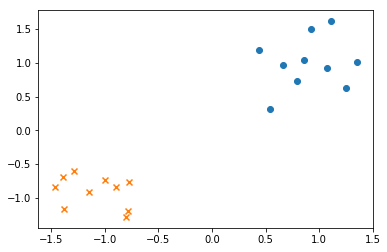

In [17]:
# Exemple d'utilisation de utils
#rappel : une gaussienne est représentée par la fonction exp(-x^2), elle a la forme d'une courbe en clauche
#elle sert à représenter les notions de moyenne,variance et ecart types

#avec une variance + petite autour de chaque axe(x et y), on obtient des points centrer autour de la moeynne associé
#à chacune des deux gaussienne
the_set = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([-1,-1]),np.array([[0.1,0],[0,0.1]]),10)

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
plot2DSet(the_set)


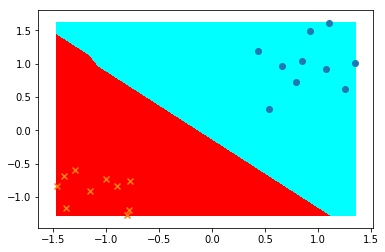

In [18]:
# Exemple d'utilisation de Classifiers pour créer un knn:

knn = ClassifierKNN(2,3)

knn.train(the_set)

plot_frontiere(the_set,knn)
plot2DSet(the_set)

<font color="RED" size="+2">**Très important**</font>: tout le reste du travail à faire dans ce TDTME ne doit être fait que dans le notebook. Il ne faut plus modifier les fichiers de la librairie.

Le compte-rendu de cette séance ne comportera que le fichier notebook.


Perceptron aléatoire
====

La classe <tt>ClassifierPerceptronRandom</tt> suivante hérite de la classe `Classifier`. Elle implémente un modèle de perceptron aléatoire qui modélise un hyperplan $f_w(x)=\langle w ; x \rangle$ tel que $w$ est tiré aléatoirement lors de la création.





In [19]:
v = np.random.rand(2)     # vecteur aléatoire à input_dimension dimensions
w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de facon à obtenir un w toujours entre -1 et 1
print(v)
print(np.linalg.norm(v))
print(w)

[0.16184147 0.19132416]
0.25059448507513504
[-2.69885056 -2.46354852]


In [20]:
class ClassifierPerceptronRandom(Classifier):
    def __init__(self, input_dimension):
        """ Argument:
                - input_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """
        v = np.random.rand(input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de v

    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.dot(x, self.w)
        return z
        
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """        
        print("No training needed")

<font color="RED" size="+1">**[Q]**</font> Tester ce modèle de perceptron sur un jeu de données aléatoire.


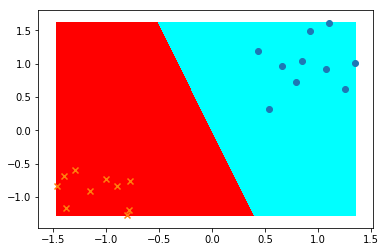

In [21]:
# Exemple de création et d'utilisation d'un Perceptron aléatoire:

perceptron_random = ClassifierPerceptronRandom(2)

plot_frontiere(the_set,perceptron_random)
plot2DSet(the_set)

Perceptron de Rosenblatt
===

<font color="RED" size="+1">**[Q]**</font> En héritant de la classe `Classifier`, écrire la classe <tt>ClassifierPerceptron</tt> qui implémente l'algorithme du Perceptron de Rosenblatt vu en cours.

La fonction `train` fera une itération sur l'ensemble des données de l'apprentissage. Les points d'apprentissage seront tirés dans un ordre aléatoire.



In [22]:
# La methode d'entrainement du Perceptron de Rosenblatt est la suivvante:
#Pour cahque point du Dataset , on predit la classe de ce point
#ensuite on incrémente le vecteur de poid w de cette facon:
#w=w+a(Yt-Y)X
# où a est le pas(epsilon) , Yt sortit attentue , Y est la sortit observé, X est Entree
#dans notres cas les Y seront les classe associé à notre dataset, X sont les vecteur associés à nos points
#w est le vecteur directeur(de poid), qui nous sert de référence pour savoir à quel classe appartient un point

In [23]:
#lagorythme du perceptron peut etre vu comme une ameliration du classifieur lineaire aletoire de la semaine passé
#car pour chaque point mal classé, il adapte le vecteur w (la frontière de décision est réhausser)

In [24]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self,input_dimension,learning_rate):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.input_dimension=input_dimension
        self.learning_rate=learning_rate #pas utilisé
        v = np.random.rand(input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = (2* v - 1) / np.linalg.norm(v) # on normalise par la norme de v # comme ca w est compris entre -1 et 1 # w est notre vecteur directeur , c'est à partirde lui quon se base pour s
       

    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        produit_scalaire=np.dot(self.w,x)
        return produit_scalaire
        

    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné 
        """
        for i in range(0,labeledSet.size()):
            x=labeledSet.getX(i)
            score=self.predict(x)
            classe_attendue=labeledSet.getY(i)[0]
            if(score>0):
                classe_observe=1
            else:
                classe_observe=-1
            self.w=self.w+(self.learning_rate*(classe_attendue-classe_observe)*x)



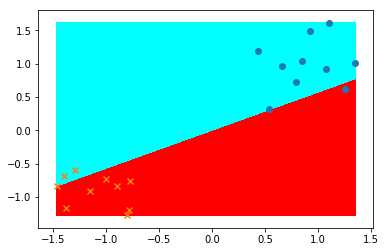

In [25]:
pe=ClassifierPerceptron(2,0.05)
pe.train(the_set)
plot_frontiere(the_set,pe)
plot2DSet(the_set)

<font color="RED" size="+1">**[Q]**</font> Tester le perceptron de la manière suivante:
- Apprendre pendant N itérations
- Afficher l'accuracy du modèle à chaque itération
- Vérifier que l'accuracy baisse
- Dessiner la frontière obtenue

accuracy: 55.0
accuracy: 50.0
accuracy: 65.0
accuracy: 65.0
accuracy: 65.0
accuracy: 60.0
accuracy: 60.0
accuracy: 55.0
accuracy: 60.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0
accuracy: 50.0


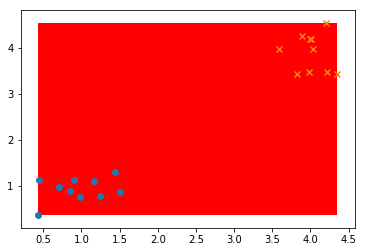

In [26]:
N=20
new_set = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([4,4]),np.array([[0.1,0],[0,0.1]]),10)
for i in range(0,N):
    pe.train(new_set)
    print("accuracy:",pe.accuracy(new_set))
    

plot_frontiere(new_set,pe)
plot2DSet(new_set)




In [27]:
# je pense que l'accuracy bisse à cause de la variation du vecteur w
#les cordonnées du vecteur de poids w changent à chaque ittérations , du coup la frontiere de decisons se modifie ,
#et le classifieur a + de mal à prédire la classe exacte de l'exemple considéré

<font color="RED" size="+1">**[Q]**</font> Expérimentations

- Générer deux ensembles de train et de test
- Dessiner la courbe de performance en fonction de l'itération sur les ensembles de train et de test
    * Que se passe-t-il en fonction du pas (epsilon) d'apprentissage ? 
    * Que se passe-t-il quand le nombre d'exemples en apprentissage est faible ? 


In [28]:
perce=ClassifierPerceptron(2,0.01)
train1 = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([4,4]),np.array([[0.1,0],[0,0.1]]),100)
train2 = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([4,4]),np.array([[0.1,0],[0,0.1]]),100)
test1 = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([1,4]),np.array([[0.1,0],[0,0.1]]),100)
test2 = createGaussianDataset(np.array([1,1]),np.array([[0.1,0],[0,0.1]]),np.array([4,1]),np.array([[0.1,0],[0,0.1]]),100)

#on calcule laccuracy sur chacun de ces ensemble de points

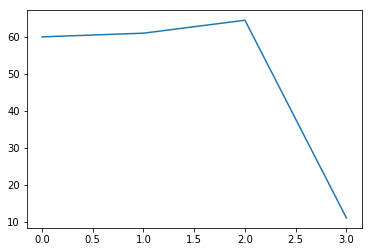

In [29]:
perfs=[]
k=[]

perce.train(train1)                  #--> 1 er ensemble entrainé
pourcentage=perce.accuracy(train1)
perfs.append(pourcentage)
k.append(0)

perce.train(train2)
pourcentage=perce.accuracy(train2)
perfs.append(pourcentage)
k.append(1)

pourcentage=perce.accuracy(test1)    # --> 1 er ensemble de test
perfs.append(pourcentage)
k.append(2)


pourcentage=perce.accuracy(test2)
perfs.append(pourcentage)
k.append(3)

plt.plot(k,perfs)
plt.show()



#On remarque que lorsque on a un ensemble faible de point , l'accuracy a tendance à stagner
#Tandis que lorsque on élargie le domaine de point du Dataset , on obtient une accuracy qui dimunue lorsque on teste l'accuracy
#sur des exemples de tests.
#L'accuracy obtenu sur des exemple d'entrainement est plus grande que celleobtenue sur des exemples de test
# Lorsque on augmente la valeur du pas, l'accuracy stagne pour chacun des ensemble, c-à-d quon obtient une accuracy
#identique pour chaque ensemble

<font color="RED" size="+1">**[Q]**</font> **Données XOR**

Ecrire la fpnction `createXOR` qui, étant donné un nombre de points $n$ et une variance $var$, permet de générer une base de données contenant:
- deux gaussiennes centrées en (0,0) et (1,1) correspondant à $n$ exemples positifs
- deux gaussiennes centrées en (1,0) et (0,1) correspondant à $n$ exemples négatifs

Dans la suite, on appelle XOR une base de données créée par cette fonction.


Que se passe-t-il quand on apprend un perceptron  ? Quel est le problème ? 

In [30]:

def createXOR(nb_points,var):
    #on concatene chacun des ensemble pour fournir une base de données contenant ces 4 ensembles
    ens1 = createGaussianDataset(np.array([0,0]),np.array([[var,0],[0,var]]),np.array([0,1]),np.array([[var,0],[0,var]]),nb_points)
    ens2 = createGaussianDataset(np.array([1,1]),np.array([[var,0],[0,var]]),np.array([1,0]),np.array([[var,0],[0,var]]),nb_points)
    #ens3 = createGaussianDataset(np.array([1,0]),np.array([[var,0],[0,var]]),np.array([0,1]),np.array([[var,0],[0,var]]),nb_points)
    #ens4 = createGaussianDataset(np.array([1,0]),np.array([[var,0],[0,var]]),np.array([0,1]),np.array([[var,0],[0,var]]),nb_points)
    une_base = LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D
    
    #j'ajoute les points positifs à ma base 
    for i in range(0,ens1.size()):
        #une_base.addExample(ens1.getX(i),ens1.getY(i)[0])   # ajout de l'exemple de chaque dataset generer au dessus
        #une_base.addExample(ens2.getX(i),ens2.getY(i)[0]) 
        #une_base.addExample(ens3.getX(i),ens3.getY(i)[0]) 
        #une_base.addExample(ens4.getX(i),ens4.getY(i)[0]) 
        ens2.addExample(ens1.getX(i),ens1.getY(i)[0])
    
    return ens2  #contient chaque exemple des 4 dataset cré plus haut 


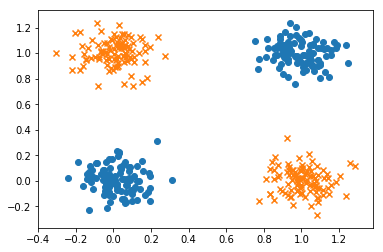

In [31]:
xor=createXOR(100,0.01)
plot2DSet(xor)

Kernel Trick
--------------

Nous allons projeter (manuellement) les données 2D dans un espace de plus grande dimension. Voici un exemple de projection qui transforme un vecteur $(x_1,x_2)$ en un vecteur $(x_1,x_2,1)$

In [32]:
class KernelBias:
    def transform(self,x):
        y=np.asarray([x[0],x[1],1])
        return y

k=KernelBias()
k.transform(the_set.getX(1))


array([-0.7808704 , -1.19628115,  1.        ])

<font color="RED" size="+1">**[Q]**</font> Implémenter la classe ClassifierPerceptronKernel qui prend un Kernel en paramètre, et calcule le perceptron sur la version "kernélisée" des données. Tester ce perceptron sur le dataset 1 (2 gaussiennes) et le dataset XOR.

In [33]:
#lidee cest de calculer le produit scalaire dans un espace de plus grande dimensions
#l'astuce du noyean est une méthode qui permet d'utiliser un classifieur linéaire pour résoudre un probleme non lineaire
#L'idée est de transformer l'espace de représentation des données d'entrées en un espace de plus grande dimension, où un 
#classifieur linéaire peut être utilisé et obtenir de bonnes performances. 

In [34]:
class ClassifierPerceptronKernel(Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.dimension_kernel=dimension_kernel
        self.learning_rate=learning_rate
        self.kernel=kernel
        #v = np.random.rand(dimension_kernel)     # vecteur aléatoire à input_dimension dimensions
        #self.w = (2* v - 1) / np.linalg.norm(v) 
        self.w=np.random.randn(self.dimension_kernel)*10*learning_rate
        #print("mon premier w",self.w)
        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        #print("w:",self.kernel.transform(self.w))
        #print("exemple:",self.kernel.transform(x))
        produit_scalaire=np.dot(self.w,self.kernel.transform(x))
        # on retourne le signe du pro
        return produit_scalaire

    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        self.cout=0 #somme des carré des erreur
        self.labeledSet=labeledSet
        iterate=[i for i in range (0,self.labeledSet.size()-1)]
        np.random.shuffle(iterate) #on modifie lordre detudes des points du dataset
        for i in iterate:
            x=self.labeledSet.getX(i)
            classe_attendue=self.labeledSet.getY(i)[0]
            score=self.predict(x)
            self.w=self.w+(self.learning_rate*(classe_attendue-score)*self.kernel.transform(x))
            self.cout+=((classe_attendue-score)**2)
       
       

Somme des carré des erreurs 40.15041504149446


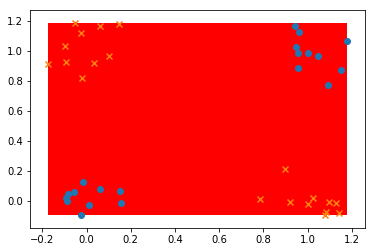

In [35]:
ker=KernelBias()
perceptronk=ClassifierPerceptronKernel(3,0.01,k)
#dtSet = createGaussianDataset(np.array([0,0]),np.array([[0.01,0],[0,0.01]]),np.array([1,1]),np.array([[0.01,0],[0,0.01]]),10)
#affiche_base(dtSet)
#plot_frontiere(dtSet,perceptronk)
#plot2DSet(dtSet)
xor=createXOR(10,0.01)
perceptronk.train(xor)
print("Somme des carré des erreurs",perceptronk.cout)
plot_frontiere(xor,perceptronk)
plot2DSet(xor)

<font color="RED" size="+1">**[Q]**</font> Implémenter le kernel : $(x_1,x_2) \rightarrow (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. Entrainer le perceptron correspondant sur le XOR. Que constatez-vous ? Donnez une explication (explication donnée en cours lors de la prochaine séance)

In [36]:
class KernelPoly:
    def transform(self,x):
        y=np.asarray([1,x[0],x[1],x[0]*x[0],x[1]*x[1],x[0]*x[1]])
        return y

N=100
k=KernelPoly()
perceptron_k=ClassifierPerceptronKernel(7,0.1,k)
mon_xor=createXOR(100,0.01)
perceptron_k.train(mon_xor)
plot_frontiere(mon_xor,perceptron_k)
plot2DSet(mon_xor)

##TESTER SUR XOR ET DESSINER LA FRONTIèRE DE DECISION

##TESTER SUR XOR ET DESSINER LA FRONTIèRE DE DECISION


ValueError: shapes (7,) and (6,) not aligned: 7 (dim 0) != 6 (dim 0)

Expérimentations sur des datasets réels
-------



A partir de datasets trouvés sur le web, réaliser un ensemble d'expérimentations permettant de comparer les 3 classifiers (knn, perceptron de Rosenblatt et version kernélisée) que vous avez implémentés.

Par exemple, vous pouvez utiliser les datasets suivants:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
- https://www.kaggle.com/uciml/indian-liver-patient-records
- voir sur les données ouvertes de Paris : https://opendata.paris.fr/explore/?sort=modified

Afin d'utiliser de tels jeux de données, il sera certainement nécessaire que vous réalisiez un prétraitement afin de pouvoir utiliser vos implémentations.